In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense

# Load your data (replace 'your_dataset.csv' with the actual file path)
file_path = 'diabetes.csv'
df = pd.read_csv(file_path)

# Define features (X) and target variable (y)
X = df.drop('Outcome', axis=1)  # Features
print(X.shape)
y = df['Outcome']  # Target variable
print(y.shape)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a simple neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

(768, 8)
(768,)
Epoch 1/10


/Users/amritgiri/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/amritgiri/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/amritgiri/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/amritgiri/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in 

20/20 [==============================] - 0s 5ms/step - loss: 0.6484 - accuracy: 0.6531 - val_loss: 0.5988 - val_accuracy: 0.7013
Epoch 2/10
20/20 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.7508 - val_loss: 0.5465 - val_accuracy: 0.7273
Epoch 3/10
20/20 [==============================] - 0s 1ms/step - loss: 0.5095 - accuracy: 0.7720 - val_loss: 0.5204 - val_accuracy: 0.7403
Epoch 4/10
20/20 [==============================] - 0s 984us/step - loss: 0.4785 - accuracy: 0.7704 - val_loss: 0.5082 - val_accuracy: 0.7727
Epoch 5/10
20/20 [==============================] - 0s 978us/step - loss: 0.4606 - accuracy: 0.7801 - val_loss: 0.5038 - val_accuracy: 0.7532
Epoch 6/10
20/20 [==============================] - 0s 984us/step - loss: 0.4499 - accuracy: 0.7834 - val_loss: 0.5056 - val_accuracy: 0.7532
Epoch 7/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4428 - accuracy: 0.7899 - val_loss: 0.5086 - val_accuracy: 0.7857
Epoch 8/10
20/20 [=======

In [10]:
# New data for prediction
new_data = pd.DataFrame({
    'Pregnancies': [6, 1, 5, 8, 3],
    'Glucose': [148, 85, 116, 183, 78],
    'BloodPressure': [72, 66, 74, 64, 50],
    'SkinThickness': [35, 29, 22, 0, 32],
    'Insulin': [0, 0, 0, 0, 88],
    'BMI': [33.6, 26.6, 25.6, 23.3, 31],
    'DiabetesPedigreeFunction': [0.627, 0.351, 0.201, 0.672, 0.248],
    'Age': [50, 31, 30, 32, 26]
})

# Standardize the features using the same scaler used during training
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

# Make predictions
predictions = model.predict(new_data_scaled)

# Convert probability predictions to binary (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Display predictions
for i, prediction in enumerate(binary_predictions):
    print(f"Prediction for Example {i + 1}: {prediction[0]}")


1/1 [==============================] - 0s 8ms/step
Prediction for Example 1: 1
Prediction for Example 2: 0
Prediction for Example 3: 0
Prediction for Example 4: 1
Prediction for Example 5: 0


/Users/amritgiri/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/amritgiri/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/amritgiri/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/amritgiri/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in 

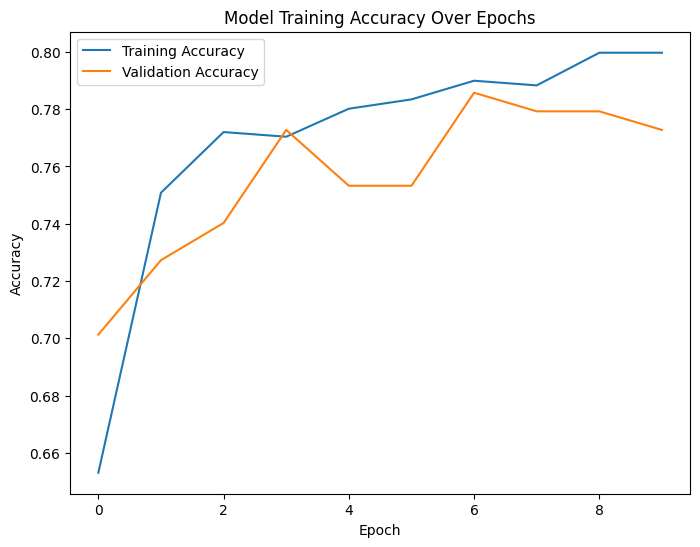

In [11]:
# Plot the training accuracy graph
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
from tensorflow import keras
import joblib

joblib.dump(scaler, 'scaler.pkl')

# To export model to be used in flutter app
model.save('prediction_model.h5')


/Users/amritgiri/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /var/folders/zj/zq5bh1nx0tz6s2wktc5bzs5w0000gn/T/tmpeis7ekl2/assets


INFO:tensorflow:Assets written to: /var/folders/zj/zq5bh1nx0tz6s2wktc5bzs5w0000gn/T/tmpeis7ekl2/assets
2023-12-17 17:24:16.874477: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-12-17 17:24:16.874608: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-12-17 17:24:16.875334: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/zj/zq5bh1nx0tz6s2wktc5bzs5w0000gn/T/tmpeis7ekl2
2023-12-17 17:24:16.875911: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-12-17 17:24:16.875916: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/zj/zq5bh1nx0tz6s2wktc5bzs5w0000gn/T/tmpeis7ekl2
2023-12-17 17:24:16.879722: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-12-17 17:24:16.907734: I tensorflow/cc/saved_model/loader.cc:217] Running initialization

In [13]:
import numpy as np

def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    # Create a NumPy array with the input features
    input_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]])

    # Standardize the input features
    input_scaled = scaler.transform(input_data)

    # Make predictions using the trained model
    prediction_prob = model.predict(input_scaled)
    prediction = (prediction_prob > 0.5).astype(int)

    return prediction

# Example usage:
# Replace the values with the actual input from your mobile app
result = predict_diabetes(2, 120, 70, 30, 150, 25.5, 0.45, 35)
print("Predicted Outcome:", result)

1/1 [==============================] - 0s 8ms/step
Predicted Outcome: [[0]]


/Users/amritgiri/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
